# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [112]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [114]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [115]:
# Get the HTML from the browser
html = browser.html

# Close the browser, since, we won't need to get anything else from the page
# after this.
browser.quit()

# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [116]:
# Extract all rows of data
table_body = soup.select_one('table.table tbody')
header = [th.text.strip() for th in table_body.select('tr th')]
rows = [
    [td.text.strip() for td in tr.select('td')]
    for tr in table_body.select('tr.data-row')
]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [158]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows, columns=header)

# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [119]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [120]:
# Change data types for data analysis
for col in 'id sol ls month'.split():
    df[col] = df[col].astype(int)
for col in 'min_temp pressure'.split():
    df[col] = df[col].astype(float)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

In [121]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [122]:
# 1. How many months are there on Mars?
num_martian_months = df['month'].nunique()
num_martian_months

12

There are 12 Martian months.  This is consistent with the documentation for the
data set (see readme).

In [123]:
# 2. How many sols (Martian days) worth of data are there?
max_sols, min_sols = df['sol'].max(), df['sol'].min()
num_sols = df['sol'].nunique()
range_sols = max_sols - min_sols + 1
print(f"{num_sols=:,d}, {range_sols=:,d}")

num_sols=1,867, range_sols=1,968


Since it was unclear whether this was asking for the range of time covered by
the data records in sols, or whether it was asking for the total number of sols
for which there are data records, I have calculated both.

The **range between the first and last record** in sols is **1,968**.  However,
the **total number of distinct sol values** for which there are records is
**1,867**.

In [124]:
# 3. What is the average minimum temperature by month?
by_month = df.groupby('month')
avg_min_temp_by_month = by_month['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

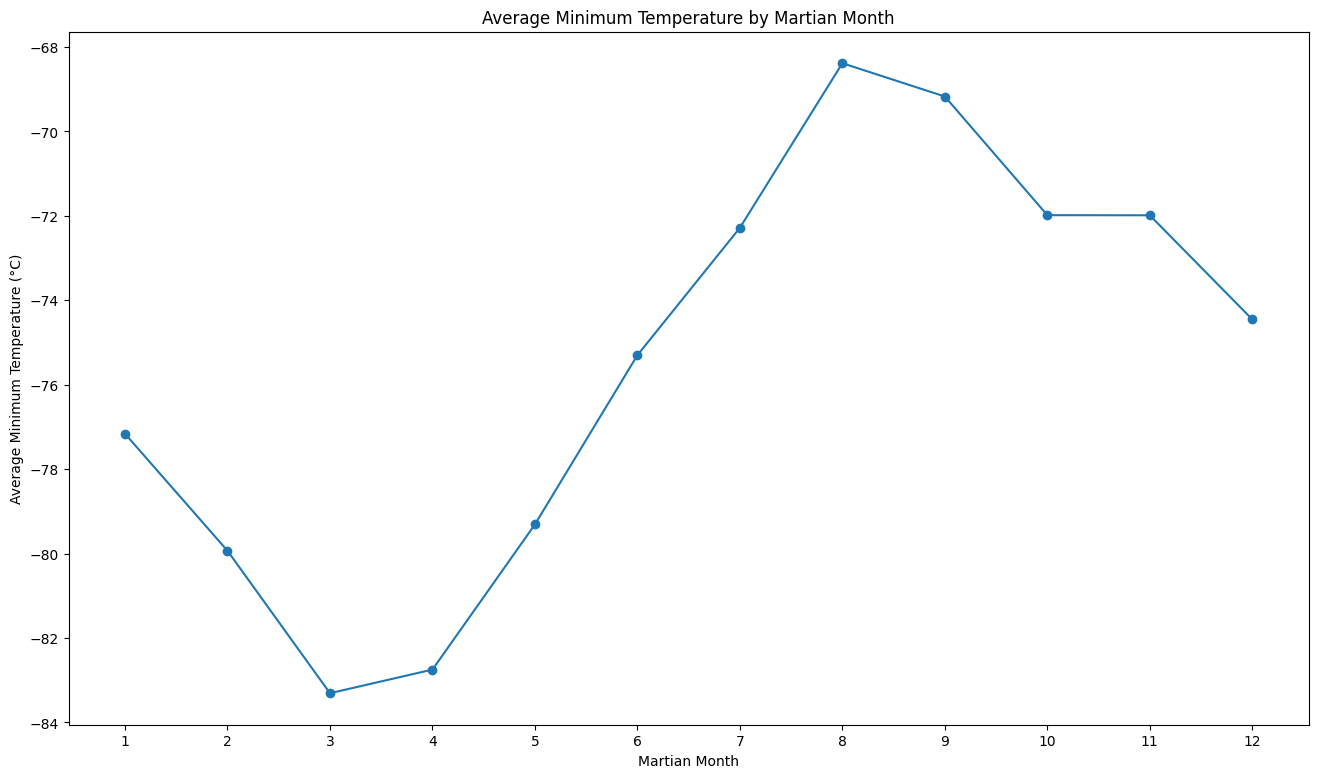

In [142]:
# Plot the average minimum temperature by month
ax = avg_min_temp_by_month.plot(kind='line', x='month', y='min_temp',
                                marker='o', figsize=(16, 9))

ax.set_xlabel('Martian Month')
ax.set_xticks(avg_min_temp_by_month.index)
ax.set_ylabel('Average Minimum Temperature (°C)')
ax.set_title('Average Minimum Temperature by Martian Month')

plt.show()

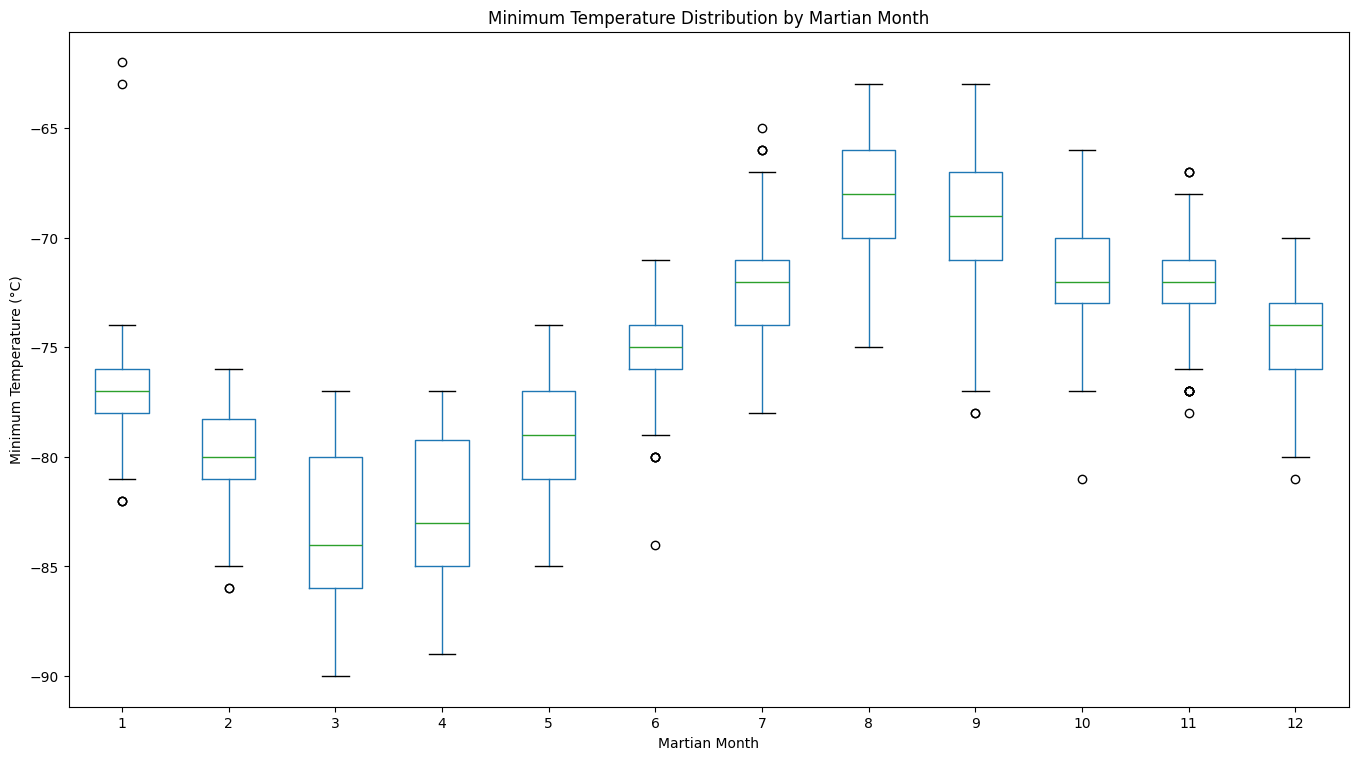

In [143]:
# This one's just for fun: a whisker box plot of min temp per martian month.
ax = df.boxplot(column='min_temp', by='month',
                grid=False, figsize=(16, 9))

ax.set_xlabel('Martian Month')
ax.set_ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature Distribution by Martian Month')
plt.suptitle('')  # Remove boxplot title that gets added by default

plt.show()

In [144]:
# Identify the coldest and hottest months in Curiosity's location by sorting the
# previous graph.
sorted_temps_df = avg_min_temp_by_month.sort_values(ascending=True)
coldest_temp, coldest_month = sorted_temps_df.iloc[0], sorted_temps_df.index[0]
warmest_temp, warmest_month = sorted_temps_df.iloc[-1], sorted_temps_df.index[-1]
print(f"The coldest month was {coldest_month} "
      f"with a temp of {coldest_temp:02.2f} °C.")
print(f"The warmest month was {warmest_month} "
      f"with a temp of {warmest_temp:02.2f} °C.")

The coldest month was 3 with a temp of -83.31 °C.
The warmest month was 8 with a temp of -68.38 °C.


The **coldest** martian month was **month 3** with an average minimum temp of
**-83.31 °C.**  The **warmest** martian month was **month 8** with an average
minimum temp of **-68.38 °C**.

In [145]:
# 4. What is the average pressure by month?
avg_pressure_by_month = by_month['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

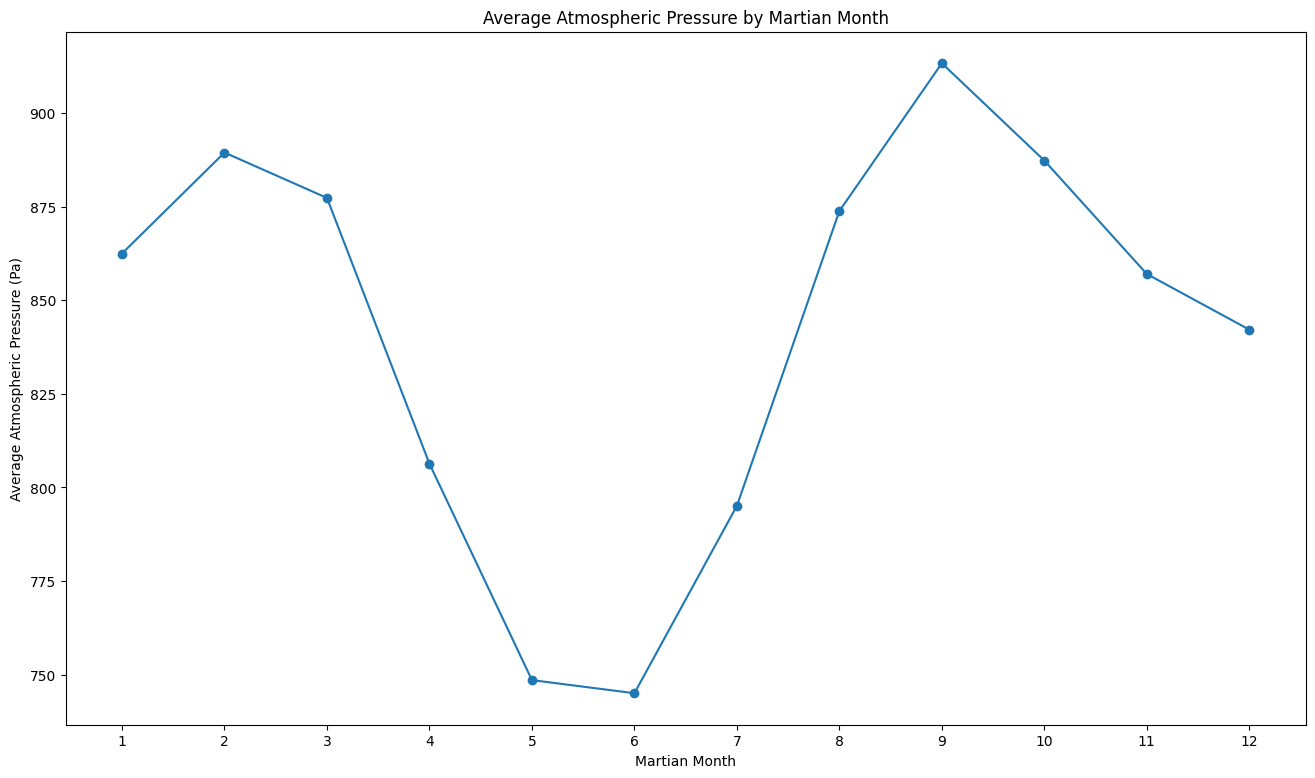

In [146]:
# Plot the average pressure by month
ax = avg_pressure_by_month.plot(kind='line', x='month', y='pressure',
                                marker='o', figsize=(16, 9))

ax.set_xlabel('Martian Month')
ax.set_xticks(avg_pressure_by_month.index)
ax.set_ylabel('Average Atmospheric Pressure (Pa)')
ax.set_title('Average Atmospheric Pressure by Martian Month')

plt.show()

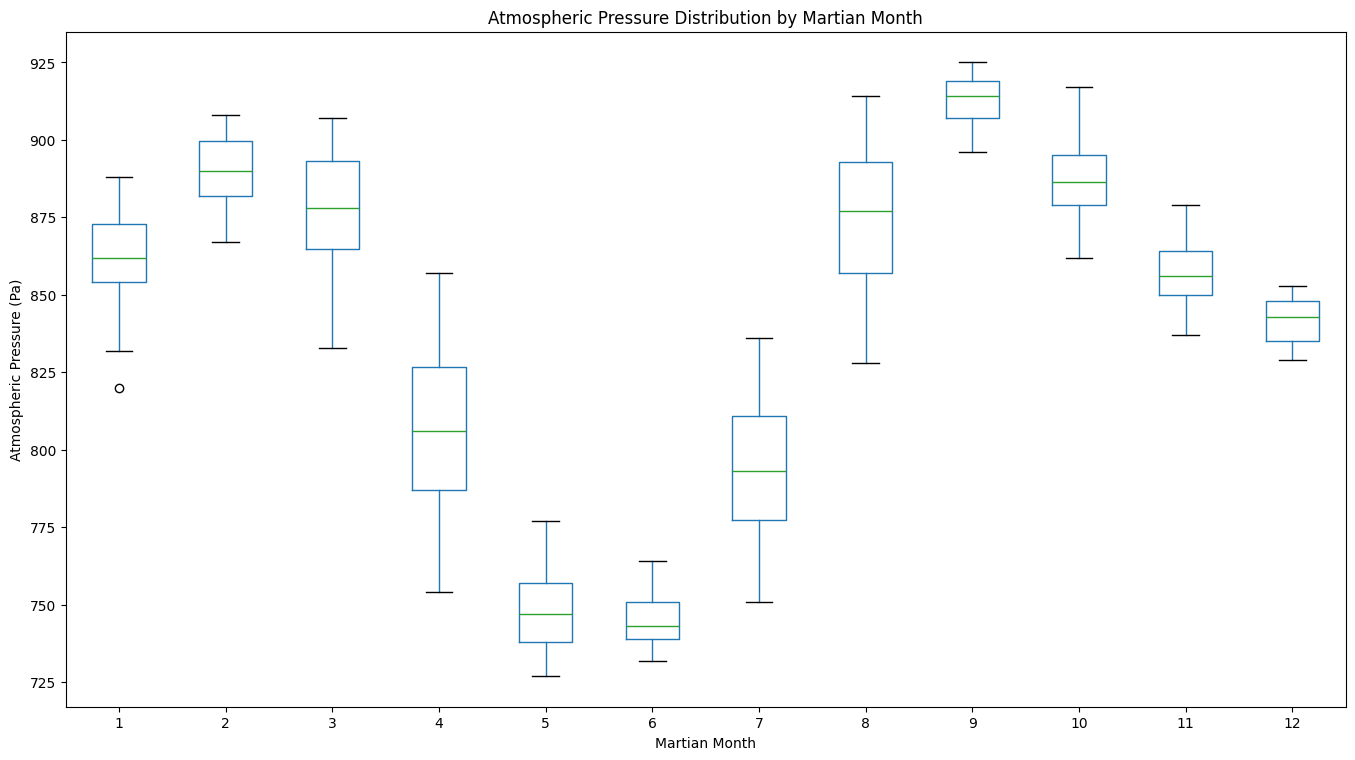

In [147]:
# This one's also just for fun: a whisker box plot of atmospheric pressure per
# martian month.
ax = df.boxplot(column='pressure', by='month',
                grid=False, figsize=(16, 9))

ax.set_xlabel('Martian Month')
ax.set_ylabel('Atmospheric Pressure (Pa)')
plt.title('Atmospheric Pressure Distribution by Martian Month')
plt.suptitle('')  # Remove boxplot title that gets added by default

plt.show()

In [148]:
# Identify the lowest and highest pressure months in Curiosity's location by
# sorting the previous graph.
sorted_press_df = avg_pressure_by_month.sort_values(ascending=True)
lowest_press, lowest_press_month = sorted_press_df.iloc[0], sorted_press_df.index[0]
highest_press, highest_press_month = sorted_press_df.iloc[-1], sorted_press_df.index[-1]
print(f"The martian month with the lowest pressure was {lowest_press_month} "
      f"with an atmospheric pressure of {lowest_press:02.2f} Pa.")
print(f"The martian month with the highest pressure was {highest_press_month} "
      f"with an atmospheric pressure of {highest_press:02.2f} Pa.")

The martian month with the lowest pressure was 6 with an atmospheric pressure of 745.05 Pa.
The martian month with the highest pressure was 9 with an atmospheric pressure of 913.31 Pa.


The martian month with the **lowest pressure** was **6** with an atmospheric
pressure of **745.05 Pa**.  The martian month with the **highest pressure** was
**9** with an atmospheric pressure of **913.31 Pa**.

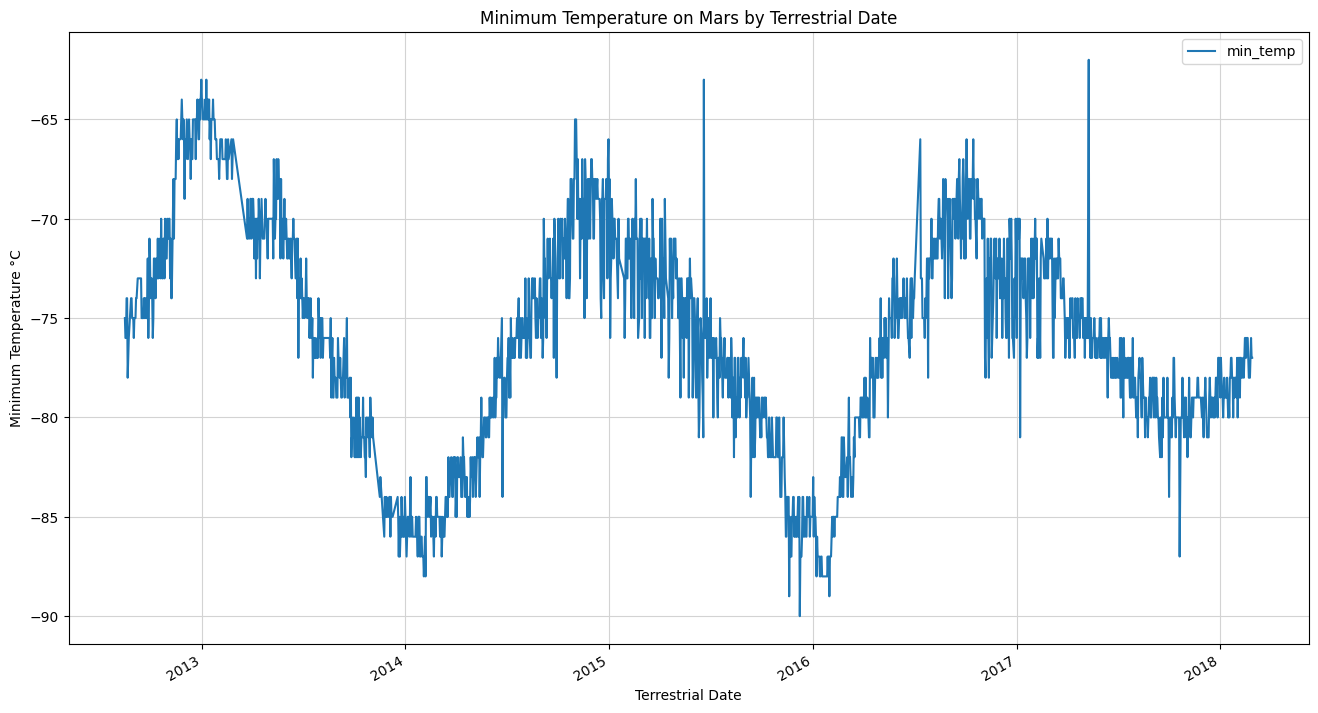

In [149]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
ax = df.plot(kind='line', x='terrestrial_date', y='min_temp',
             grid=True, figsize=(16,9))

ax.set_xlabel('Terrestrial Date')
ax.set_ylabel('Minimum Temperature °C')
ax.set_title('Minimum Temperature on Mars by Terrestrial Date')
ax.grid(color='lightgray')

plt.show()

Through visual estimation, both between the first and third peak and between the
first and third trough in the Minimum Temperature on Mars by Terrestrial Date,
there seems to be a gap of about 3.75 years, so I estimate that a Martian year
is roughly 680 terrstrial days (365*3.75/2 rounded to 2 significant figures).

In [157]:
print(f"{365*3.75/2:0.1e}")

6.8e+02


#### Minimum Temperature

The average minimum temperature by month ranges from -83.31 °C at its coldest on
Martian month 3, to -68.38 °C at its warmest on Martian month 8.

#### Atmospheric Pressure

The average atmospheric pressure by Martian month ranges from 745.05 Pa at its
lowest on Martian month 6, to 913.31 Pa at its highest on Martian month 9.

#### Year Length

Through visual analysis of the periodic paks and troughs of the minimum
temperature graph by terrestrial date, I estimate that there are 3.75 Earth
years between a Martian year peaks or troughs.  This gives an estimate of 680
terrestrial days per Martian year, when rounding to 2 significant figures.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [159]:
# Write the data to a CSV
df.to_csv('mars_weather.csv', index=False, header=True, encoding='utf-8')